# Exploring Data with Python using Jupyter Notebooks

- Special Thanks to Galvanize for the basis of this Jupyter Notebook!

### Objectives

- use Python and Pandas to analyse a dataset of Hotel Receipts

### Possible Business Goals

This document will get part-way (more-or-less) to each of the following business goals:

1. Inform an investor where he should build his next hotel (a first-pass market research effort).

2. Hilton has hired you to do an analysis for their hotels in Texas.

3. Identify best months for hotels in San Antonio to offer sales and promotions to drive profit.

# Import the libraries we'll need.

In python, you use the `import` statement to load libraries into your script.

In [158]:
# matplotlib is used for...you guessed it: plotting!
import matplotlib.pyplot as plt

# Pandas is the "Python Data Analysis Library". We use it for loading data from disk and
# for manipulating and printing data.
import pandas as pd
import seaborn as sns

# This next line is a Jupyter directive. It tells Jupyter that we want our plots to show
# up right below the code that creates them.
%matplotlib inline

Pandas by default will not print every column in our data if there are A LOT of columns. For this notebook, we would prefer that Pandas print all the columns no matter what, so let's tell Pandas our wishes:

In [159]:
pd.set_option('display.max_columns', None)

# Let's read some data!

This data was obtained from https://data.texas.gov/

In [160]:
raw_dataframe = pd.read_csv("Hotel_Tax.csv")

### Woo! We have data. Now let's look at it!

Pandas makes it easy to peek into your data and see what you have. The first step in any data project is to get to know your data.

Let's start by looking at the first 3 rows of data. That's easy to do using the `head()` method on our DataFrame:

In [161]:
raw_dataframe.head(3)

,Month,Year,Taxpayer Number,Taxpayer Name,Taxpayer Address,Taxpayer City,Taxpayer State,Taxpayer Zip,Taxpayer County,Outlet Number,Location Name,Location Address,Location City,Location State,Location Zip,Location County,Location Room Capacity,Location Tot Room Receipts,Location Taxable Receipts,Taxpayer Geolocation,Location Geolocation
0,7,2015,32009496855,MARCUS C STARKEY,PO BOX 1780,PORT ARANSAS,TX,78373.0,178,155,(PB 114) TERRY L CARTER,2012 HWY 361 #114,PORT ARANSAS,TX,78373,178.0,1,$6010.00,$6010.00,"PO BOX 1780\nPORT ARANSAS, TX 78373\n","2012 HWY 361 #114\nPORT ARANSAS, TX 78373\n"
1,7,2015,32009496855,MARCUS C STARKEY,PO BOX 1780,PORT ARANSAS,TX,78373.0,178,156,(PB 205) LARRY OR VICKY MURPHY,2012 HWY 361 # 205,PORT ARANSAS,TX,78373,178.0,1,$9855.00,$9855.00,"PO BOX 1780\nPORT ARANSAS, TX 78373\n","2012 HWY 361 # 205\nPORT ARANSAS, TX 78373\n"
2,7,2015,32009496855,MARCUS C STARKEY,PO BOX 1780,PORT ARANSAS,TX,78373.0,178,194,(PB101) STEVEN AND MARY MORGAN,2012 HWY 361 #101,PORT ARANSAS,TX,78373,178.0,1,$9425.00,$9425.00,"PO BOX 1780\nPORT ARANSAS, TX 78373\n","2012 HWY 361 #101\nPORT ARANSAS, TX 78373\n"


Looks good at first glance. We'll dig in more later, but first let's ask Pandas to give us info about the datatype of each columns:

In [162]:
raw_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17977 entries, 0 to 17976
Data columns (total 21 columns):
Month                         17977 non-null int64
Year                          17977 non-null int64
Taxpayer Number               17977 non-null int64
Taxpayer Name                 17977 non-null object
Taxpayer Address              17977 non-null object
Taxpayer City                 17977 non-null object
Taxpayer State                17975 non-null object
Taxpayer Zip                  17975 non-null float64
Taxpayer County               17977 non-null int64
Outlet Number                 17977 non-null int64
Location Name                 17977 non-null object
Location Address              17977 non-null object
Location City                 17977 non-null object
Location State                17977 non-null object
Location Zip                  17977 non-null int64
Location County               17975 non-null float64
Location Room Capacity        17977 non-null int64
Location Tot

Most of the stuff above looks correct:
- _Month_ is encoded as an integer, so pandas is correct in identifying the _Month_ column as an integer.
- _Name_, _Address_, _City_, and _State_ are correctly identified as strings (that's what pandas means when it says something is an object).
- _County_ is also encoded as an integer, so pandas is correct again.
- ... etc...

There are a few things above that don't look right:
- Why is _Taxpayer Zip_ a floating point number?
- Why is _Location County_ a floating point number?
- _Location Tot Room Receipts_ has a dollar sign in it which is why pandas thinks it's a string instead of a number.
- Ditto for _Location Taxable Receipts_.

# Let's clean our data.

We idenified four issues above, so let's fix each one.

In [163]:
# Let's work in a new DataFrame so that we don't loose our original data.
# (It's often useful to have the original data on-hand.)
dataframe = raw_dataframe.copy()

In [164]:
# Convert _Taxpayer Zip_ to an integer.
dataframe['Taxpayer Zip'] = dataframe['Taxpayer Zip'].fillna(0.0).astype(int)

In [165]:
# Convert _Location County_ to an integer.
dataframe['Location County'] = dataframe['Location County'].fillna(0.0).astype(int)

In [166]:
# Convert _Location Tot Room Receipts_ to a float.
dataframe['Location Tot Room Receipts'] = \
    dataframe['Location Tot Room Receipts'] \
        .replace('[\$,]', '', regex=True).astype(float, inplace=True)

In [167]:
# Convert _Location Tot Room Receipts_ to a float.
dataframe['Location Taxable Receipts'] = \
    dataframe['Location Taxable Receipts'] \
        .replace('[\$,]', '', regex=True).astype(float, inplace=True)

Again, let's have pandas give us info about what it thinks the datatype of each column is. It should all look good now:

In [168]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17977 entries, 0 to 17976
Data columns (total 21 columns):
Month                         17977 non-null int64
Year                          17977 non-null int64
Taxpayer Number               17977 non-null int64
Taxpayer Name                 17977 non-null object
Taxpayer Address              17977 non-null object
Taxpayer City                 17977 non-null object
Taxpayer State                17975 non-null object
Taxpayer Zip                  17977 non-null int64
Taxpayer County               17977 non-null int64
Outlet Number                 17977 non-null int64
Location Name                 17977 non-null object
Location Address              17977 non-null object
Location City                 17977 non-null object
Location State                17977 non-null object
Location Zip                  17977 non-null int64
Location County               17977 non-null int64
Location Room Capacity        17977 non-null int64
Location Tot Roo

Woot! This time the datatypes look correct. So, datatypes are good... next we'll look at the content of our data.

# Exploratory Data Analysis

### Sanity Check

Let's look at the head again. It should be the same as before, but we'll look again to remind ourselves what it looks like.

In [169]:
dataframe.head(3)

,Month,Year,Taxpayer Number,Taxpayer Name,Taxpayer Address,Taxpayer City,Taxpayer State,Taxpayer Zip,Taxpayer County,Outlet Number,Location Name,Location Address,Location City,Location State,Location Zip,Location County,Location Room Capacity,Location Tot Room Receipts,Location Taxable Receipts,Taxpayer Geolocation,Location Geolocation
0,7,2015,32009496855,MARCUS C STARKEY,PO BOX 1780,PORT ARANSAS,TX,78373,178,155,(PB 114) TERRY L CARTER,2012 HWY 361 #114,PORT ARANSAS,TX,78373,178,1,6010.0,6010.0,"PO BOX 1780\nPORT ARANSAS, TX 78373\n","2012 HWY 361 #114\nPORT ARANSAS, TX 78373\n"
1,7,2015,32009496855,MARCUS C STARKEY,PO BOX 1780,PORT ARANSAS,TX,78373,178,156,(PB 205) LARRY OR VICKY MURPHY,2012 HWY 361 # 205,PORT ARANSAS,TX,78373,178,1,9855.0,9855.0,"PO BOX 1780\nPORT ARANSAS, TX 78373\n","2012 HWY 361 # 205\nPORT ARANSAS, TX 78373\n"
2,7,2015,32009496855,MARCUS C STARKEY,PO BOX 1780,PORT ARANSAS,TX,78373,178,194,(PB101) STEVEN AND MARY MORGAN,2012 HWY 361 #101,PORT ARANSAS,TX,78373,178,1,9425.0,9425.0,"PO BOX 1780\nPORT ARANSAS, TX 78373\n","2012 HWY 361 #101\nPORT ARANSAS, TX 78373\n"


I'm noticing something that might be wrong. We'll have to keep this in mind as we move forward: Why is 'Location Room Capacity' equal 1 for these rows? Are these hotels with just one room each? Maybe... we'll keep this in mind.

For now let's get an idea about the distribution of the 'Location Room Capacity' column. We'll create a histogram over this column.

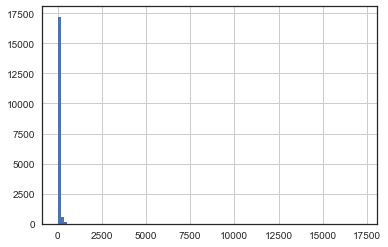

In [170]:
dataframe['Location Room Capacity'].hist(bins=100)

... well... that wasn't very informative! That's okay, let's try again. This time we'll only look at rows where the 'Location Room Capacity' is less than 50; this will make us sort-of "zoom in" on the part that's most interesting:

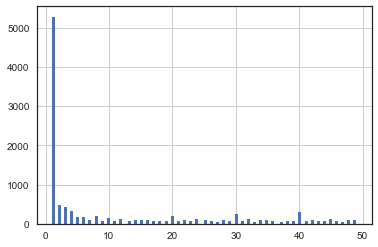

In [171]:
rows_of_interest = (dataframe['Location Room Capacity'] < 50)
dataframe[rows_of_interest]['Location Room Capacity'].hist(bins=100)

Humm... is that spike at 'Location Room Capacity' == 1? Let's find out.

In [172]:
(dataframe['Location Room Capacity'] == 1).sum()

5276

... yep, that spike is at 'Location Room Capacity' == 1.

There seems to be way too many hotels with 'Location Room Capacity' == 1. It's possible that whoever created this dataset is filling all "unknown values" with the value 1.

In [173]:
# The lines below drop the 'bad' rows in the dataset.
# Rerun on second time through. 

print("Orig size:", dataframe.shape)
dataframe = dataframe[dataframe['Location Room Capacity'] > 1]
print("New size:", dataframe.shape)

Orig size: (17977, 21)
New size: (12701, 21)


### Visualization (histograms and scatterplots)

#### Number of States Represented

Let's see what states are represented in this data. (It _should_ only be Texas, but let's check.)

In [174]:
## Group dataframe by state
agg = dataframe.groupby('Location State').apply(len)

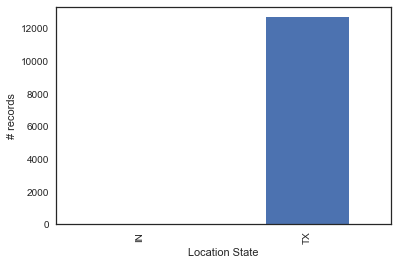

In [175]:
## Plot histogram of records
agg.plot(kind='bar').set_ylabel('# records')

... We have some non-Texas stuff in here! Let's get a textual printout for more detail.

In [176]:
## Display the counts for each value
dataframe['Location State'].value_counts()

TX    12699
IN        2
Name: Location State, dtype: int64

... Indiana... what's up with that? Let's keep only the Texas rows.

In [177]:
## Subset to only Texas rows
texas_df = dataframe[dataframe['Location State'] == 'TX']

#### Number of Cities Represented

How many unique cities are represented?

In [178]:
# How many unique cities are in our dataset?
texas_df['Location City'].describe()

count       12699
unique        658
top       HOUSTON
freq         1120
Name: Location City, dtype: object

#### Histogram: Number of unique hotels in each city

In [179]:
# Count the number of unique hotels in each city:

## Group Texas df by city and get counts
city_counts = texas_df.groupby('Location City')['Taxpayer Number'].nunique()

In [180]:
## Sort values by counts
city_counts.sort_values(axis=0, ascending=False, inplace=True)

In [181]:
## Get top 50 cities
top_cities = city_counts > 50

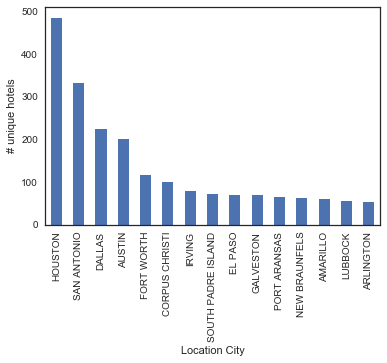

In [182]:
## Plot a barchart of unique hotels
city_counts[top_cities].plot(kind='bar').set_ylabel('# unique hotels')

#### Exploring the numeric columns

In [183]:
# Now let's focus on the numeric columns.
# Create a list of the numeric columns
numeric_columns = ['Month', 'Year', 'Outlet Number', 'Location Room Capacity',
                   'Location Tot Room Receipts', 'Location Taxable Receipts']

In [184]:
# Let's look at some stats for our numeric columns:
texas_df[numeric_columns].describe()

,Month,Year,Outlet Number,Location Room Capacity,Location Tot Room Receipts,Location Taxable Receipts
count,12699.000000,12699.0,12699.000000,12699.000000,1.269900e+04,1.269900e+04
mean,7.502795,2015.0,13.092842,75.641547,1.428364e+05,1.233902e+05
std,0.500012,0.0,43.592113,241.979413,3.544799e+05,2.903193e+05
min,7.000000,2015.0,1.000000,2.000000,0.000000e+00,0.000000e+00
25%,7.000000,2015.0,1.000000,23.000000,1.454726e+04,1.094312e+04
50%,8.000000,2015.0,1.000000,54.000000,5.573664e+04,4.325000e+04
75%,8.000000,2015.0,2.000000,92.000000,1.559256e+05,1.362628e+05
max,8.000000,2015.0,371.000000,17211.000000,1.552075e+07,7.142023e+06


#### Pairplot over a few numeric columns-of-interest

For this dataset, this turns out to not be very interesting, but it's good to always look at this anyway!

A _pairplot_ (also known as a _scatter matrix_) will plot every column vs every other column. It's a quick way to see which pairs of columns are correlated (or not).

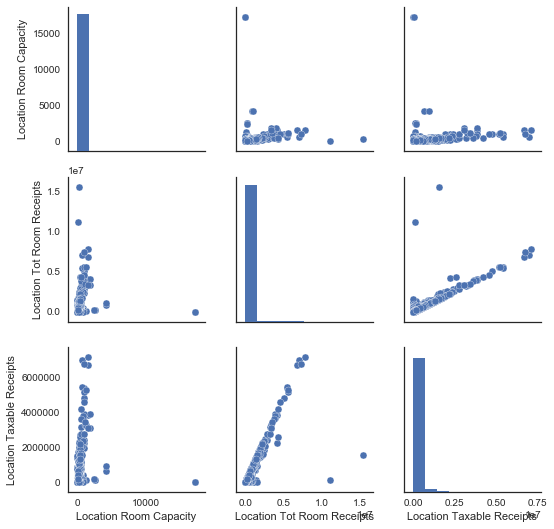

In [185]:
cols_of_interest = ['Location Room Capacity', 'Location Tot Room Receipts',
                    'Location Taxable Receipts']
plt.figure(figsize=(10, 8))
sns.set_style("white")
sns.pairplot(texas_df[cols_of_interest])

#### Compare two cities: Scatterplot 'Location Room Capacity' vs 'Location Tot Room Receipts' for each city

Does it seem that Austin and El Paso are different, or are they basically the same? (We'll explore this more further later on, but for now let's just look at the pretty picture and make our best guess.)

/Users/cschl1/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/cschl1/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


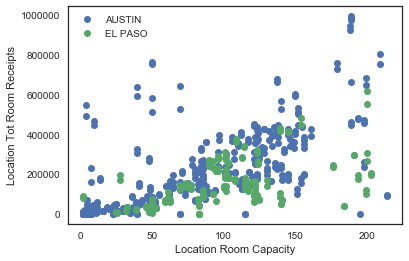

In [186]:
### Use matplotlib for this! 
cities_of_interest = ['AUSTIN', 'EL PASO']

# Scatter plot by city.
for city in cities_of_interest:
    # Filter to only the city
    city_mask = (texas_df['Location City'] == city)
    # Filter to large room capacity hotels
    size_mask = (texas_df['Location Room Capacity'] < 220)
    # Plot Room receipts versus capacity 
    plt.plot(texas_df[city_mask][size_mask]['Location Room Capacity'],
             texas_df[city_mask][size_mask]['Location Tot Room Receipts'],
             linestyle='',
             marker='o',
             alpha=1,
             label=city)

# Label the axis
plt.xlabel('Location Room Capacity')
plt.ylabel('Location Tot Room Receipts')
plt.legend(numpoints=1)

Humm... I don't know about you, but I didn't expect this! There are two things here that surprised me:
1. The trend-line is not very strong. There is a general upward trend, but it is riddled with noise.
2. These cities do not differ much! Average income per room is roughly the same in each city.

The takeaway (this is usually the takeaway), is two-fold:
1. Your data is probably not as clean asd pretty as you'd like, and
2. Often your assumptions about what you will find are just plain wrong.

... Seeing this now changes the direction I was planning to head. That's why we do Exploratory Data Analysis! 

Also: Imagine this senario: Your investor friend was told that Austin is in desparate need of hotels--that there is more demand than supply and that it would be a great time to build a hotel in Austin because you could get amazing ROI. Your investor friend comes to you to varify this. We're not finished with our analysis yet, but it's not looking good for that theory so far.

#### Histogram of every numeric column

This is another graph that you should make for every dataset you get. It is often useful. For this dataset, it's less useful though. :(

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12d7dbb00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12dfc8748>]], dtype=object)

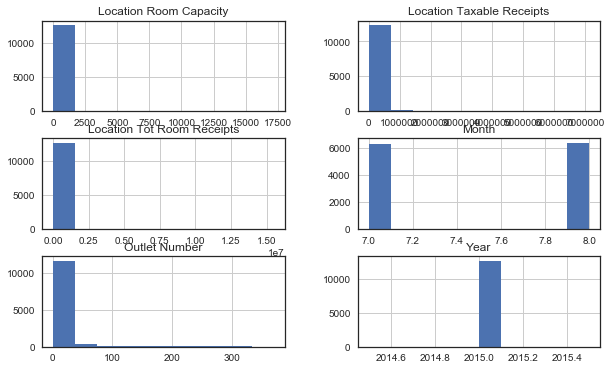

In [187]:
# Create histograms of numeric columns
texas_df[numeric_columns].hist(bins=10, figsize=(10, 6))

#### Years and Months, what do we have of each?

We only have one year (2015), see:

In [188]:
# How many hotels do we have of each year? 
texas_df['Year'].value_counts()

2015    12699
Name: Year, dtype: int64

We only have two months (July and August), see:

In [189]:
# Looks like these are all from 2015. Let's see how many
# of each month we have.
texas_df['Month'].value_counts()

8    6385
7    6314
Name: Month, dtype: int64

#### Histogram: Avg 'room capacity' per city (top cities only)

In [190]:
## Group by Capacity
city_counts = texas_df.groupby('Location City')['Location Room Capacity'].mean()

In [191]:
## Sort the counts
city_counts.sort_values(axis=0, ascending=False, inplace=True)

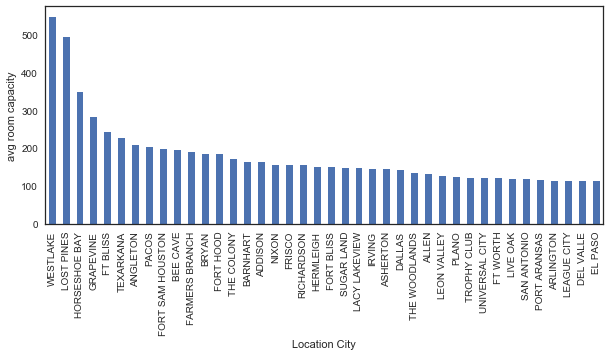

In [192]:
## Plot barchart of counts >110
city_counts[city_counts>110].plot(kind='bar', figsize=(10, 4)).set_ylabel('avg room capacity')

#### Histogram: Avg income per room per night per city (top cities only)

In [193]:
num_days = 31 + 31  # <-- both July and August each have 31 days in them.
## Group Texas by City
cities = texas_df.groupby('Location City')

In [194]:
## Get total receipts
city_receipts = cities['Location Tot Room Receipts'].sum()

In [195]:
## Get total room capacity
city_rooms = cities['Location Room Capacity'].sum()

In [196]:
## Get income per room per night
city_income_per_room_per_night = city_receipts / city_rooms / num_days

In [197]:
## Sort income per room per night
city_income_per_room_per_night.sort_values(axis=0, ascending=False, inplace=True)

In [198]:
## Find most profitable cities
most_profitable_cities = city_income_per_room_per_night > 100

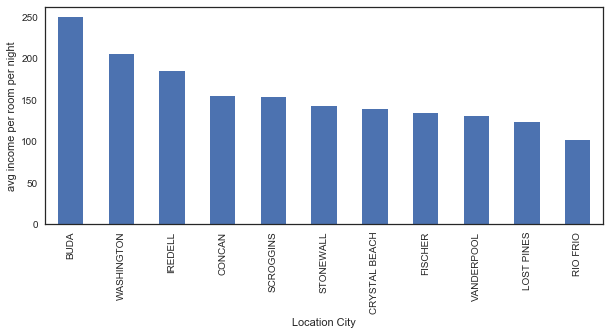

In [199]:
## Plot most profitable cities
city_income_per_room_per_night[most_profitable_cities].plot(kind='bar', figsize=(10, 4)) \
    .set_ylabel('avg income per room per night')

#### RED ALERT: What's up with SOUTHLAKE?

In [200]:
# What's up with SOUTHLAKE?
texas_df[texas_df['Location City'] == 'SOUTHLAKE']

,Month,Year,Taxpayer Number,Taxpayer Name,Taxpayer Address,Taxpayer City,Taxpayer State,Taxpayer Zip,Taxpayer County,Outlet Number,Location Name,Location Address,Location City,Location State,Location Zip,Location County,Location Room Capacity,Location Tot Room Receipts,Location Taxable Receipts,Taxpayer Geolocation,Location Geolocation


Our data says that this hotel in Southlake has only one room. Let's look into whether or not that's true. Here's the website for that hotel in Southlake:
http://www3.hilton.com/en/hotels/texas/hilton-dallas-southlake-town-square-DFWSLHF/index.html

Okay... that hotel above definitely has more than one room! Remember how we concidered dropping rows where 'Location Room Capacity' == 1? Well, I think it's time to pull the trigger on that decision. 

__HINT: THERE IS CODE IN ONE OF THE CELLS ABOVE THAT DOES THIS, BUT IT IS COMMENTED OUT--ALL YOU NEED TO DO IS UNCOMMENT THAT CODE AND RUN ALL THE CELLS FROM THERE TO HERE AGAIN. NOTICE WHAT CHANGES AS YOU RE-RUN EACH CELL.__

#### Is there much of a difference between the month of July and the month of August?

In [201]:
# How does the specific month affect the avg income per room per night?

## Group Texas by City and Month
cities = texas_df.groupby(['Location City', 'Month'])

In [202]:
## Sum the total room receipts
city_receipts = cities['Location Tot Room Receipts'].sum()

In [203]:
## Sum the total capacity
city_rooms = cities['Location Room Capacity'].sum()

In [204]:
## Calculate income per room per night
city_income_per_room_per_night = city_receipts / city_rooms / num_days

In [205]:
## Unstack grouped calculation
city_income_per_room_per_night = city_income_per_room_per_night.unstack()

In [206]:
## Calculate average of July and August
city_income_per_room_per_night['avg_7_8'] = (city_income_per_room_per_night[7] + \
                                             city_income_per_room_per_night[8]) / 2

In [207]:
## Sort averages
city_income_per_room_per_night.sort_values(by='avg_7_8', ascending=False, inplace=True)

In [208]:
## Identify most profitable cities
most_profitable_cities = city_income_per_room_per_night['avg_7_8'] > 100

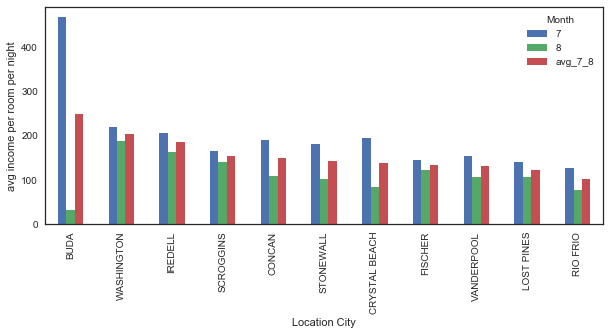

In [209]:
## Plot most profitable cities
city_income_per_room_per_night[most_profitable_cities].plot(kind='bar', figsize=(10, 4)) \
    .set_ylabel('avg income per room per night')

Haha. Buda had a great month of July! (Or it was a data entry error.) It does seem that in general, the month of July was better for hotels than the month of August. The graph above only shows the top cities, let's look at ALL cities and compare the July vs Auguest.

In [210]:
# Seems July (7) was a better month for the top cities than August (8). Let's see if this
# was overall true for the entire dataset.
print('July Avg:', city_income_per_room_per_night[7].mean())
print('Aug Avg: ', city_income_per_room_per_night[8].mean())

July Avg: 25.19008193335837
Aug Avg:  20.40243391986012


Yep. Seems like on average hotels' month of July was better than August.

... but... remember how we saw that Buda had a REALLY GOOD month of July? We need to look into that more. We'll leave that as an exercise for you! Figure out if:
1. Buda really did have a REALLY GOOD month in July, or
2. We are seeing some data-entry error... in which case we need to fix it and re-run our analysis.